In [31]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import ticker 

In [98]:
f_path = os.path.join(os.getcwd(), 'NGA_West2_finitefault.csv')

nga = pd.read_csv(f_path)

nga.head(5)

,EQID,Earthquake Name,Moment Magnitude,Magnitude Type,Finite Fault Flag,Hypocenter Latitude (deg),Hypocenter Longitude (deg),Hypocenter Depth (km),Total Fault Length (km),Total Fault Width (km),...,Depth: ULC (km).10,Segment Number.11,Strike (deg).11,Dip (deg).11,Length (km).11,Width (km).11,Rake (deg).11,Latitude: Upper Left Corner (ULC) (deg),Longitude: ULC (deg).11,Depth: ULC (km).11
0,1,"Helena, Montana-01",6.0,Mw,0,46.61,-111.960,6.0,16.2,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"Helena, Montana-02",6.0,U,0,46.62,-111.970,6.0,15.3,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Humbolt Bay,5.8,Mw,0,40.40,-125.100,10.0,8.9,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Imperial Valley-01,5.0,U,0,32.90,-115.217,16.0,2.2,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Northwest Calif-01,5.5,Mw,0,40.30,-124.800,10.0,4.4,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
nga.drop(nga["Hypocenter Depth (km)"].idxmax(), inplace=True)


7.9

In [115]:

momag = nga["Moment Magnitude"].to_numpy()
dep = nga["Hypocenter Depth (km)"].to_numpy()

# momag = momag[~(np.isnan(momag))]
# dep = dep[~(np.isnan(dep))]


true_momag = list(map(lambda x: x*1.5+16, momag))
for i in range(0,5):
    try:
        m = np.polyfit(momag, dep, i)

    except:
        continue

In [116]:
m

array([9.84232598])

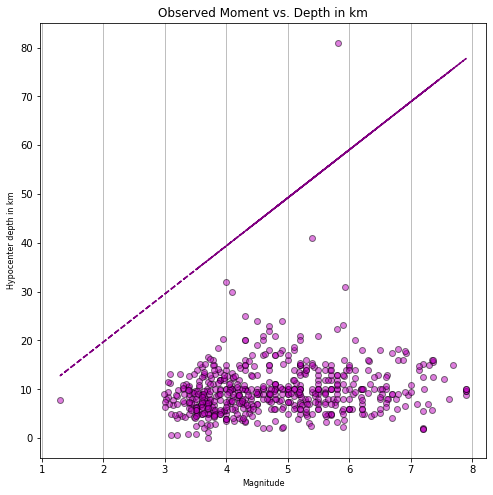

In [118]:
"""PLOTTING DATA ANALYSIS"""

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)


ax.plot(momag, dep, marker='o', color='m', markeredgecolor='black', linestyle='None',
alpha = 0.5)

ax.plot(momag, momag*m, linestyle='--', color='purple')

ax.set_xlabel("Magnitude", fontsize = 8)
ax.set_ylabel("Hypocenter depth in km", fontsize=8)

ax.set_xscale('linear')

plt.title('Observed Moment vs. Depth in km')

ticker.FormatStrFormatter('?%2f')


plt.grid(which = 'both', axis='x')
plt.show()

In [10]:
import os
path = 'c:/Users/kickk/USC Class/DSCI 510/final_project_dsci510'

f_path = os.path.join(path)

In [11]:
f_path

'c:/Users/kickk/USC Class/DSCI 510/final_project_dsci510'

In [9]:
path = 'c:\Users\kickk\USC Class\DSCI 510\final_project_dsci510'


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-9-6a0510e5b70c>, line 1)

In [5]:
os.getcwd()

'c:\\Users\\kickk\\USC Class\\DSCI 510\\final_project_dsci510'

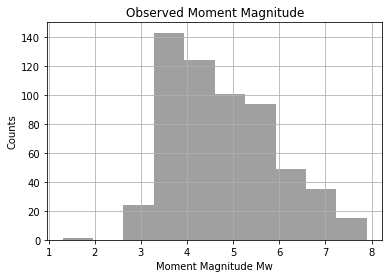

In [61]:
fix, ax = plt.subplots()

# Setting figure size
fig.set_figheight(10)
fig.set_figwidth(10)

plt.hist(momag, density=False, facecolor='grey', alpha = 0.75)

ax.set_xscale('linear')

ax.set_xlabel('Moment Magnitude Mw')
ax.set_ylabel('Counts')

plt.grid(which='major')
plt.title("Observed Moment Magnitude")

plt.show()
